<h1> Analisis Defensa al Consumidor - Servicios de comunicación</h1>

## Introduccion

Este analisis es fruto del enojo sobre el modelo de venta de los servicios de comunicaciones (sea este el servicio de banda ancha y telefonia)
En mi condicion de frustracion por no poder resolver mis problemas con el servicio de internet, y ante la duda de realizar una denuncia a defensa del consumidor para la devolucion de un porcentaje mal debitado de un producto, preferi hacer un analisis de las denuncias generales de Defensa al Consumidor en la CIUDAD AUTONOMA DE BUENOS AIRES (ya que estan facilitados los datos en la pagina oficial de CABA), y entender el porque realmente en la tipica popular de ***'TODOS LOS SERVICIOS DE INTERNET FUNCIONAN MAL'***, si realmente funcionan mal, ... o en realidad funcionan mal en donde vos vivis 😧😧😧😧

Si querés conocer la representacion de su frustración en datos concretos, segui de cerca este analisis. Si es alguien que nunca se quejo de su servicio banda ancha, en primer lugar muchas felicitaciones; aún asi estas invitado a aventurarte a este analisis y las reflexiones finales.

Diría por amor al telling story que los datos 'me sorprendieron', pero no fue así.



**Para entonarnos en este ecosistema de datos vamos a tener en cuenta unos tips importantes:**

    1. 'Servicio de comunicaciones' = Internet o banda ancha (el servicio de comunicaciones incluye el paquete de telefonia, internet, television por cable, generalmente los 3 juntos o solo internet junto a la telefonia);
    2. La localizacion se divide en comunas, por eso, se adjuntara una tabla en que ciudades de CABA corresponden a cada comuna PREVIO al analisis de *Servicios de comunicación*;
    3. Hay 3 COMUNAS que no se incluian en el data frame de la pagina oficial de CABA (comuna 5, 8 y 10);


Todos los Data Frame son públicos en la pagina: *https://data.buenosaires.gob.ar/*

## Normalización de datos


### Pasos previos:
    -Importacion de librerias: Pandas, Numpy, Seaborn, Matplotlib
    -Importacion del DataFrame principal
    -Simplificar titulos cabecera
    -Cambiar forma de contenido
    

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

En nuestra tabla principal tenemos los siguientes conceptos: **denuncias_id, fecha, comuna, motivo_denuncia, rubro**

Dentro de estos conceptos, limpiamos lineas de texto que no aportan a nuestra investigacion

In [79]:
# Importacion de tabla

original_table = pd.read_csv('./data/denuncias-defensa-del-consumidor.csv', 
    delimiter=';', 
    header=0, 
    names=['denuncias_id', 'fecha', 'comuna', 'motivo_denuncia', 'rubro']
)


# 1. Convertimos en minuscula el rubro, que por defecto, estaba en mayuscula; 2. capitalizamos

original_table['rubro'] = original_table.rubro.str.lower().str.capitalize()
original_table


# Eliminamos 'Art 11 Ley 24.240', 'Art. 7 de la Ley 24.240' del motivo; ocupa espacio visual innecesario

replace_elements = [
    '. Art 11  Ley 24.240',
    ' Art. 7 de la Ley 24.241',
    'Art. 7 de la Ley 24.240',
    ': presupuestos, constancias de pagos, solicitud de servicios, reglamento general de prestaciones.'
]




# Reemplazamos lineas de texto innecesarias
original_table['motivo_denuncia'] = original_table['motivo_denuncia'].replace({
    replace_elements[0]:''
}, regex=True)
original_table['motivo_denuncia'] = original_table['motivo_denuncia'].replace({
    replace_elements[1]:'' 
}, regex=True)
original_table['motivo_denuncia'] = original_table['motivo_denuncia'].replace({
    'Art. 7 de la Ley 24.240':''
}, regex=True)
original_table['motivo_denuncia'] = original_table['motivo_denuncia'].replace({
    ': presupuestos, constancias de pagos, solicitud de servicios, reglamento general de prestaciones.':''
}, regex=True)

original_table['motivo_denuncia'] = original_table['motivo_denuncia'].replace({
    ': presupuestos, constancias de pagos,   solicitud de servicios, reglamento general de prestaciones.':''
}, regex=True)
original_table['motivo_denuncia'] = original_table['motivo_denuncia'].replace({
    ': factura, remito, ticket, etc.':''
}, regex=True)


original_table


,denuncias_id,fecha,comuna,motivo_denuncia,rubro
0,1999,2019-01-02 11:07:51,11,Garantia de Bienes - Falta de suministro de pa...,Electrodomesticos y artefactos para el hogar
1,2000,2019-01-02 11:10:31,11,Falta de cumplimento garantia posventa,Electrodomesticos y artefactos para el hogar
2,2001,2019-01-02 11:31:03,11,Practicas Abusivas - Venta Enganosa,"Servicios financieros (tarjetas de credito, ba..."
3,2002,2019-01-02 12:19:49,11,Garantia de Bienes - Reparacion insatisfactoria,Electrodomesticos y artefactos para el hogar
4,2003,2019-01-02 15:02:31,11,Garantia de Bienes - Reparacion insatisfactoria,Electrodomesticos y artefactos para el hogar
...,...,...,...,...,...
33047,30886,2020-09-30 12:26:56,14,Rechazo de la devolucion del bien,"Textil, calzado y marroquineria"
33048,30886,2020-09-30 12:26:56,14,Falta de cumplimento garantia posventa,"Textil, calzado y marroquineria"
33049,30886,2020-09-30 12:26:56,14,Demora en la entrega del bien,"Textil, calzado y marroquineria"
33050,30887,2020-09-30 12:27:23,6,Rechazo de la devolucion del bien,Muebles


### Normalizacion
    -Separar informacion que no sea utilizada en el analisis
        * delimitar fecha de hora
        * delimitar el motivo de la denuncia (+33.000) de su descripcion (3000) y aclaracion (50)
        * Eliminar columnas irrelevantes (nulls e inutilizables para el proyecto (fecha y descripciones))

In [80]:
# creamos una copia de la tabla original

df = original_table


# Se decidio que para el estudio, la hora de denuncia no es relevante

date = df.fecha.str.split(pat=' ', expand=True).drop(columns=1)


# Teniendo en cuenta que menos de 1 de cada 10 motivos tienen descripcion, dejamos en uso unicamente el motivo


reason = df.motivo_denuncia.str.split(pat='-', expand=True).drop(columns=[1,2]).rename(columns={0:'motivos'})
# Ver simplificado      -->      reason.count()


# Realizamos merge entre las columnas

df = df.merge(date, right_index=True,left_index=True).merge(reason, right_index=True,left_index=True)


# Eliminamos columnas que no necesitemos 

df = df.drop(columns=['fecha','motivo_denuncia',0])



# ---------------------- FILA FAKE? -----------------------
# Mientras se realizaba un analisis de los motivos, se encontraron 2 motivos denominados 'jdjdjdjd' y se eliminaron los datos asociados


errors = df[df['motivos'] == 'jdjdjdjd'].index

df = df.drop(errors)


# ----------------------

df_copy = df
# creamos una copia para la no modificacion de la tabla original
df



,denuncias_id,comuna,rubro,motivos
0,1999,11,Electrodomesticos y artefactos para el hogar,Garantia de Bienes
1,2000,11,Electrodomesticos y artefactos para el hogar,Falta de cumplimento garantia posventa
2,2001,11,"Servicios financieros (tarjetas de credito, ba...",Practicas Abusivas
3,2002,11,Electrodomesticos y artefactos para el hogar,Garantia de Bienes
4,2003,11,Electrodomesticos y artefactos para el hogar,Garantia de Bienes
...,...,...,...,...
33047,30886,14,"Textil, calzado y marroquineria",Rechazo de la devolucion del bien
33048,30886,14,"Textil, calzado y marroquineria",Falta de cumplimento garantia posventa
33049,30886,14,"Textil, calzado y marroquineria",Demora en la entrega del bien
33050,30887,6,Muebles,Rechazo de la devolucion del bien


## Analisis 1 - Analisis general RUBRO / MOTIVO

Normalizada nuestra tabla principal, podemos empezar a analizar.

La denamica de denuncias se divide en **Rubro de la denuncia** como los tipos de denuncias que se realicen (sea este por ejemplo *servicios de comunicacion*, *muebles*, o *servicios financieros* entre otros), y por otro lado, la razon que afecta cada tipo de rubro denominado como **Motivo de denuncia** (sea este *demora*, *falta de devolucion*, *garantia*, entre otros).

Harémos un analisis general de las denuncias según rubro para entender la magnitud de las denuncias por **SERVICIO DE COMUNICACION** y haremos un analisis general de los motivos para entender cual es el sentido de las denuncias.

#### Codigos, tablas, graficos de los RUBROS

C:\Users\Romen\AppData\Local\Temp\ipykernel_15004\2557752842.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rubros_top20 = rubros_cantidad.head(20).append(
C:\Users\Romen\AppData\Local\Temp\ipykernel_15004\2557752842.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rubros_top20_total = rubros_top20.append(


,rubros,cantidad,porcentaje
0,Servicios de comunicaciones,7297,22.08
1,"Servicios financieros (tarjetas de credito, ba...",5764,17.44
2,Electrodomesticos y artefactos para el hogar,3234,9.79
3,"Textil, calzado y marroquineria",2497,7.56
4,Muebles,1649,4.99
5,"Servicios turisticos hoteles, hosterias, alber...",1430,4.33
6,Telefonia y redes,1289,3.90
7,"Rodados, automotores y embarcaciones",1187,3.59
8,Informatica,1109,3.36
9,Alimentos y bebidas,1084,3.28


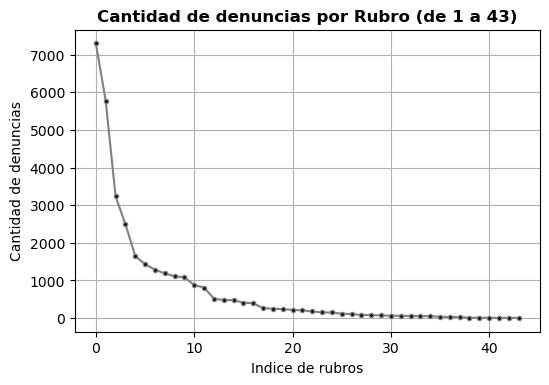

In [81]:
# ----------------------------------------- RUBRO ---------------------------------------------------
# -------------- Grafico de denuncias por cantidad, tabla de los 20 rubros mas relevantes------------ 

# Creamos una tabla con cantidad de denuncias hechas por rubro, y su representacion porcentual

rubros_cantidad = df['rubro'].value_counts()
rubros_cantidad = pd.DataFrame(rubros_cantidad, columns=['rubro','cantidad']).reset_index().rename(
        columns={'index':'rubros','rubro':'cantidad','cantidad':'borrado'}).drop(columns='borrado')
rubros_cantidad['porcentaje'] = round( 
                                (rubros_cantidad['cantidad']/rubros_cantidad['cantidad'].sum())*100 
                                ,2)


# Reducimos la informacion a los primeros 20; creamos una constante para el resto de rubros

otros_rubro = rubros_cantidad.tail(24)
rubros_top20 = rubros_cantidad.head(20).append(
        {'rubros'   :'Otros rubros',
        'cantidad'  :sum(otros_rubro.cantidad),
        'porcentaje':round( sum(otros_rubro.porcentaje),2 )}, ignore_index=True
)


# Agregamos la suma porcentual de los rubros en una columna nueva, para que se vea la magnitud de los mismos

rubros_top20_total = rubros_top20.append(
        {'rubros'   :'TOTAL',
        'cantidad'  :sum(rubros_cantidad.cantidad),
        'porcentaje':round( sum(rubros_cantidad.porcentaje) )}, 
        ignore_index=True
    )


# Grafico 1: visualizacion 
fig, ax = plt.subplots(1,1,figsize=(6,4), dpi=100)

ax.plot(rubros_cantidad.index, rubros_cantidad.cantidad,color='gray', marker='.', markerfacecolor='black')
ax.grid('g-.')

#Textos
ax.set_xlabel('Indice de rubros')
ax.set_ylabel('Cantidad de denuncias')

#Subtitulo
ax.set_title('Cantidad de denuncias por Rubro (de 1 a 43)', weight=1000, fontsize=12)

# plt.hist(data, bins=50)

rubros_top20_total



C:\Users\Romen\AppData\Local\Temp\ipykernel_15004\2793240238.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rubros_top5 = rubros_cantidad.head(5).append(
C:\Users\Romen\AppData\Local\Temp\ipykernel_15004\2793240238.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rubros_top5_total = rubros_top5.append(


,rubros,cantidad,porcentaje
0,Servicios de comunicaciones,7297,22.08
1,"Servicios financieros (tarjetas de credito, ba...",5764,17.44
2,Electrodomesticos y artefactos para el hogar,3234,9.79
3,"Textil, calzado y marroquineria",2497,7.56
4,Muebles,1649,4.99
5,Otros rubros,12609,38.13
6,TOTAL,33050,100.00


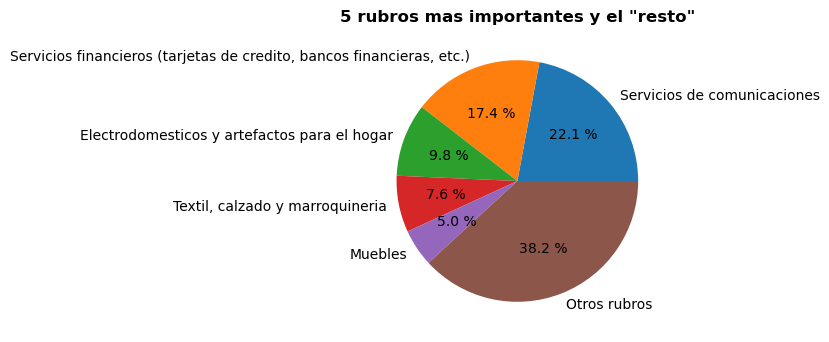

In [82]:
# --------------- Grafico de torta de los 4 rubros mas relevantes ------------------------

from turtle import color


otros_rubro_torta = rubros_cantidad.tail(39)
rubros_top5 = rubros_cantidad.head(5).append(
        {'rubros'   :'Otros rubros',
        'cantidad'  :sum(otros_rubro_torta.cantidad),
        'porcentaje':round( sum(otros_rubro_torta.porcentaje),2 )}, ignore_index=True
)


# Agregamos la suma porcentual de los rubros en una columna nueva, para que se vea la magnitud de los mismos

rubros_top5_total = rubros_top5.append(
        {'rubros'   :'TOTAL',
        'cantidad'  :sum(rubros_cantidad.cantidad),
        'porcentaje':round( sum(rubros_cantidad.porcentaje) )}, 
        ignore_index=True
    )


# Diferencia entre 'Servicio de comunicaciones' con otros rubros

dif_serv1 = rubros_top5_total.cantidad[0] - rubros_top5_total.cantidad[1]
dif_serv2 = rubros_top5_total.cantidad[0] - rubros_top5_total.cantidad[2]
dif_serv_p1 = round(rubros_top5_total.porcentaje[0] - rubros_top5_total.porcentaje[1], 2)
dif_serv_p2 = round(rubros_top5_total.porcentaje[0] - rubros_top5_total.porcentaje[2],2)



# Grafico 2: Torta 
fig, ax = plt.subplots(1,1,figsize=(6,4), dpi=100)

ax.pie(rubros_top5.cantidad, labels=rubros_top5.rubros, autopct='%0.1f %%')
ax.grid('g-.')


#Subtitulo
ax.set_title('5 rubros mas importantes y el "resto"', weight=1000, fontsize=12)

# plt.hist(data, bins=50)


rubros_top5_total

Nuestro primer analisis nos arroja resultados interesantes. Las denuncias por *Servicios de comunicaciones* esta en primer lugar con 7.297 denuncias sobre un total de 33.050 denuncias. Eso absorve el total del 22,1% de las denuncias por rubro. En segundo lugar tenemos a los *servicios financieros* (17,4%, 5.744 denuncias) y como tercero, ya diferenciandose en cantidad, *Electrodomesticos y artefactos de hogar* (9,4%, 3.232 denuncias).

Un calculo rapido tambien nos hizo dar cuenta que los Servicios de comunicacion tiene una diferencia con el segundo rubro de 1.533 (4,64%) y una diferencia de 4.063 denuncias (12,29) con el rubro de electrodomesticos para el hogar.

Vemos que si bien, la diferencia entre servicios de comunicacion y financiero es amplio, su diferencia con el tercer rubro es mucho mayor (mas del doble).

Ademas, entre los 3 primeros rubros suman casi el 50% del total de las denuncias realizadas.

In [83]:
#### Codigos, tablas, graficos de los MOTIVOS

C:\Users\Romen\AppData\Local\Temp\ipykernel_15004\2156990132.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  motivos_top20 = motivos_cantidad.head(20).append(
C:\Users\Romen\AppData\Local\Temp\ipykernel_15004\2156990132.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  motivos_top20_total = motivos_top20.append(


,motivos,cantidad,porcentaje
0,Incumplimiento total de la prestacion del serv...,4956,15.00
1,Falta de Informacion,4542,13.74
2,Falta de Entrega del bien,3769,11.40
3,Deficiente calidad en la prestacion del servicio,2324,7.03
4,Falta de cumplimento garantia posventa,1556,4.71
5,Cumplimiento parcial o defectuoso de la presta...,1555,4.70
6,Producto no funciona,1551,4.69
7,Demora en la entrega del bien,1543,4.67
8,Clausulas abusivas o no convenidas,1245,3.77
9,Falta de procesamiento de baja del servicio/ g...,1170,3.54


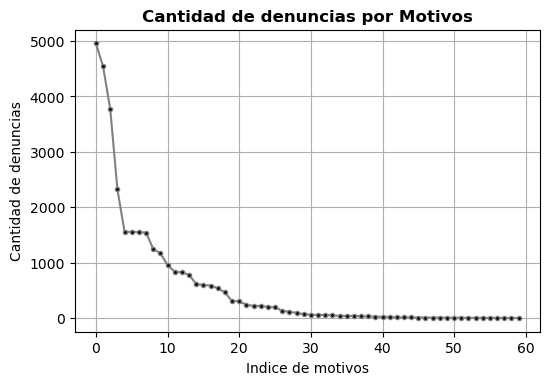

In [84]:
 # -------------------------------- MOTIVOS --------------------------------
# Creamos una tabla en donde tenga la cantidad de denuncias hechas por motivos, y su representacion porcentual

motivos_cantidad = df['motivos'].value_counts()
motivos_cantidad = pd.DataFrame(motivos_cantidad, columns=['motivos','cantidad']).reset_index().rename(
        columns={'index':'motivos','motivos':'cantidad','cantidad':'borrado'}).drop(columns='borrado')
motivos_cantidad['porcentaje'] = round( 
                                (motivos_cantidad['cantidad']/rubros_cantidad['cantidad'].sum())*100 ,2)


# Reducimos la informacion a los primeros 20; creamos una constante para el resto de motivos


otros_motivos = motivos_cantidad.tail(40)
motivos_top20 = motivos_cantidad.head(20).append(
        {'motivos'   :'Otros motivos',
        'cantidad'  :sum(otros_motivos.cantidad),
        'porcentaje':round( sum(otros_motivos.porcentaje),2 )}, ignore_index=True
)


# Agregamos la suma porcentual de los rubros en una columna nueva, para que se vea la magnitud de los mismos

motivos_top20_total = motivos_top20.append(
        {'motivos'   :'TOTAL',
        'cantidad'  :sum(motivos_cantidad.cantidad),
        'porcentaje':round( sum(motivos_cantidad.porcentaje) )}, 
        ignore_index=True
    )


# --------------------------- Grafico 1: visualizacion -------------------------------
fig, ax = plt.subplots(1,1,figsize=(6,4), dpi=100)

ax.plot(motivos_cantidad.index, motivos_cantidad.cantidad,color='gray', marker='.', markerfacecolor='black')
ax.grid('g-.')

#Textos
ax.set_xlabel('Indice de motivos')
ax.set_ylabel('Cantidad de denuncias')

#Subtitulo
ax.set_title('Cantidad de denuncias por Motivos', weight=1000, fontsize=12)

# plt.hist(data, bins=50)

motivos_top20_total



C:\Users\Romen\AppData\Local\Temp\ipykernel_15004\2443951847.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  motivos_top5 = motivos_cantidad.head(5).append(
C:\Users\Romen\AppData\Local\Temp\ipykernel_15004\2443951847.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  motivos_top5_total = motivos_top5.append(


Text(0.5, 1.0, '5 motivos mas importantes y el "resto"')

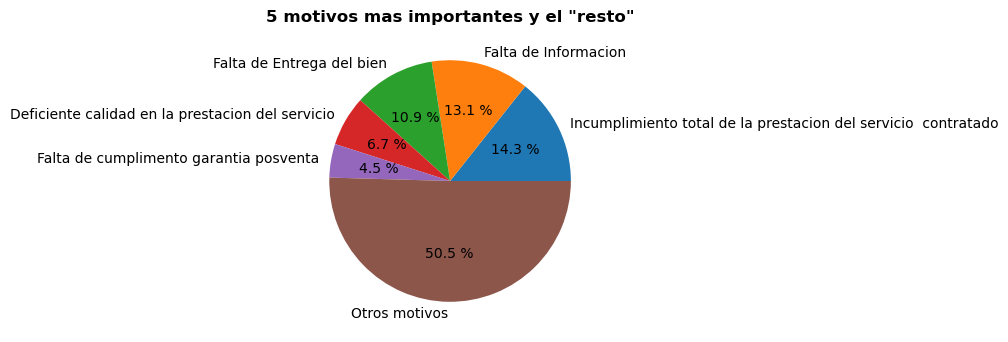

In [85]:
# --------------- Grafico de torta de los 4 rubros mas relevantes ------------------------

otros_motivos_torta = motivos_cantidad.tail(56)
motivos_top5 = motivos_cantidad.head(5).append(
        {'motivos'   :'Otros motivos',
        'cantidad'  :sum(otros_motivos_torta.cantidad),
        'porcentaje':round( sum(otros_motivos_torta.porcentaje),2 )}, ignore_index=True
)


# Agregamos la suma porcentual de los rubros en una columna nueva, para que se vea la magnitud de los mismos

motivos_top5_total = motivos_top5.append(
        {'motivos'   :'TOTAL',
        'cantidad'  :sum(motivos_cantidad.cantidad),
        'porcentaje':round( sum(motivos_cantidad.porcentaje) )}, 
        ignore_index=True
    )


# Grafico 2: Torta 
fig, ax = plt.subplots(1,1,figsize=(6,4), dpi=100)

ax.pie(motivos_top5.cantidad, labels=motivos_top5.motivos, autopct='%0.1f %%')
ax.grid('g-.')


#Subtitulo
ax.set_title('5 motivos mas importantes y el "resto"', weight=1000, fontsize=12)


# plt.hist(data, bins=50)

Los motivos (en cantidad) en comparacion de los rubros son mas parejos. Vemos que llos 3 motivos mas relevantes es
    1. Incumplimiento de la prestacion del servicio
    2. Falta de informacion
    3. Falta de entrega
Un poco mas abajo encontramos 
    4. Deficiente calidad en la prestacion de servicio.

Luego de 4 rubros que rondan los 4,5%, la curva comienza a aplanarse hasta llegar al motivo 60.
Los 5 principales rubros no acumulan el 50% de denuncias, por ello sera mas importante analizar cada uno de los motivos en relacion al rubro **Servicio de comuinicaciones**

#### Relacion RUBRO sobre MOTIVOS
    Cuadro ilustrativo de relacion RUBRO sobre MOTIVO y mapa de calor

motivos,Incumplimiento total de la prestacion del servicio contratado,Deficiente calidad en la prestacion del servicio,Falta de procesamiento de baja del servicio/ gastos asociados,Falta de Informacion,"Debito o imposicion de seguros no solicitados, convenidos o autorizados",Producto no funciona,Falta de Entrega del bien,Cumplimiento parcial o defectuoso de la prestacion del servicio,Falta de procesamiento de baja del servicio gastos asociados,Falta de cumplimento garantia posventa,Falta de entrega o emision del documento de contratacion del servicio
rubro,,,,,,,,,,,
Servicios de comunicaciones,2065,1592,0,1073,0,0,0,639,587,0,481
"Servicios financieros (tarjetas de credito, bancos financieras, etc.)",1003,0,1170,1069,780,0,0,615,0,0,184
Electrodomesticos y artefactos para el hogar,0,0,0,261,0,709,618,0,0,494,0
"Textil, calzado y marroquineria",0,0,0,315,0,108,683,0,0,310,0
"Servicios turisticos hoteles, hosterias, albergues, etc.",652,173,0,168,0,0,0,20,0,0,42
Muebles,0,0,0,217,0,97,492,0,0,163,0
Alimentos y bebidas,0,0,0,131,0,0,419,0,0,0,0
Servicios y eventos de esparcimiento culturales y/o deportivos,411,120,0,104,0,0,0,47,0,0,75
Servicios de transporte terrestre de pasajeros y cargas,313,159,0,132,0,0,0,33,0,0,47


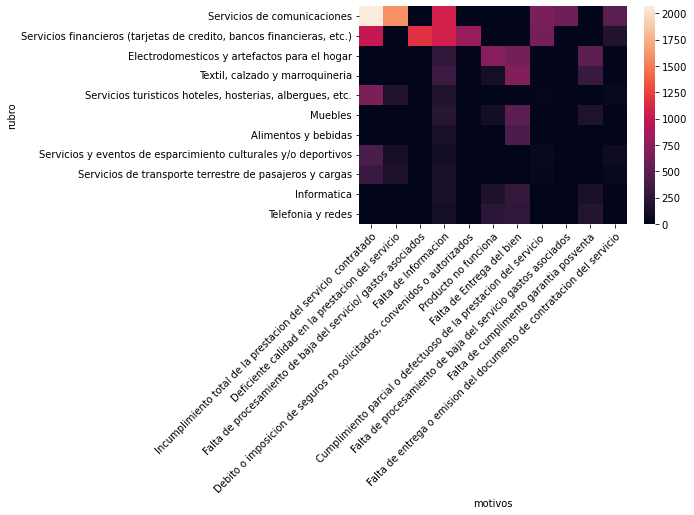

In [86]:
# -------------------------------- RELACION ENTRE RUBROS Y MOTIVOS -----------------------------------------------
# ------------------------- Tomamos en cuenta los datos mas relevantes ---------------------------------------------

crosstab_grand = pd.crosstab(index=df['rubro'], columns=df['motivos'])


rows_index = crosstab_grand.max(axis=1).sort_values(ascending=False).index
col_index = crosstab_grand.max().sort_values(ascending=False).index


order_cross = crosstab_grand.loc[rows_index,col_index].iloc[0:11,0:11]




mot_ax = sns.heatmap(order_cross)
mot_ax = plt.setp(mot_ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")




mot_ax
order_cross



Gracias al mapa de color, podemos identificar rapidamente que para los servicios, los rubros mas importantes son:
    *Incumplimiento de la prestacion del servicio contratado
    *Deficienciente calidad de la prestacion
    *Falta de informacion
Podemos identificar ademas en el rubro de servicio 2 items importantes que se relacionan entre sí que son:
    *Cumplimiento parcial o defectuoso del servicio
    *Falta de procesamiento de baja del servicio
En menor medida para los servicios vemos tambien la *falta de entrega o emision de documento de contratacion*



## Analisis segundo #2 - Analisis profundo sobre RUBRO **SERVICIOS DE COMUNICACIONES**

Luego del anterior analisis podemos determinar los siguientes puntos:
    *Los servicios de comunicacion son el rubro con mayor denuncias nominales realizadas superando en 1.533 denuncias (4,64%) al 2do rubro y una diferencia de 4.063 denuncias (12,29%) al tercer rubro
    *El el predominio de los 5 motivos de denuncias es generado por la densidad de denuncias realizadas por el rubro **Servicios de comunicaciones**
    *Solo entre la relacion entre el rubro de **Servicios de comunicacion** y los motivos por **Incumplimiento del a prestacion de servicio** y **Deficiente calidad** acumulan mas de 3.500 denuncias (mas del 10% total de las denuncias realizadas en caba en 16 meses)

En el siguiente analisis, profundizaremos sobre los items relacionados al *rubro* **Servicios de comunicacion**

Puntos a tocar en el analisis
    *Profundizar los motivos, encontrar concordancias
    *Buscar relacion entre motivos y comunas; relacion nominal y real sobre el porcentaje de la poblacion
    *Concluciones parciales

Los barrios de la Ciudad Autonoma de Buenos Aires se agrupan por comunas. Cada una tiene una determinada poblacion.

In [87]:
# ----------------------- Tabla de BARRIOS por COMUNA --------------
# ---------------------------- A TENER PRESENTE --------------------
comunas_barrios_df = pd.read_csv('./data/comunas.csv', 
    delimiter=';', 
    header=0, 
    names=['1','2','3','comuna','barrios','4','5']
).drop(columns=['1','2','3','4','5']).sort_values(by='comuna').reset_index().drop(columns='index')


comunas_barrios_df

,comuna,barrios
0,1.0,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...
1,2.0,RECOLETA
2,3.0,BALVANERA - SAN CRISTOBAL
3,4.0,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...
4,5.0,ALMAGRO - BOEDO
5,6.0,CABALLITO
6,7.0,FLORES - PARQUE CHACABUCO
7,8.0,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI
8,9.0,LINIERS - MATADEROS - PARQUE AVELLANEDA
9,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...


In [88]:
# ------------------ ANALISIS de SERVICIOS DE COMUNICACIONES ------------------------
# ------------------ Normalizacion de categoria en el rubro SERVICIOS DE COMUNICACIONES ---------------------------

# ---------------- Importamos excel de poblacion por comuna -----------------------
population_file = pd.read_excel('./data/gcba_pob_comunas_17.xlsx',
    names=['comuna','poblacion'])



# eliminamos columna 'fecha' y filtramos unicamente los 'servicios de comunicacion'
only_service = df
only_service_located = only_service['rubro'] == 'Servicios de comunicaciones'

# creamos una nueva tabla con todas las demas columnas que se relacionen a los servicios de comunicacion
only_service = only_service[only_service_located].reset_index().drop(columns=['index','denuncias_id','rubro'])

only_service

,comuna,motivos
0,4,Cumplimiento parcial o defectuoso de la presta...
1,11,Incumplimiento total de la prestacion del serv...
2,12,Cumplimiento parcial o defectuoso de la presta...
3,12,Precios
4,9,Deficiente calidad en la prestacion del servicio
...,...,...
7292,11,Incumplimiento total de la prestacion del serv...
7293,15,Incumplimiento total de la prestacion del serv...
7294,15,Deficiente calidad en la prestacion del servicio
7295,15,Falta de entrega o emision del documento de co...


C:\Users\Romen\AppData\Local\Temp\ipykernel_15004\2581791696.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_motivos_r = tabla_motivos.append(
C:\Users\Romen\AppData\Local\Temp\ipykernel_15004\2581791696.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top5_total_motivos = total_motivos_r.head(5).append(


,motivos,cantidad,porcentaje
0,Incumplimiento total de la prestacion del serv...,2065,28.30
1,Deficiente calidad en la prestacion del servicio,1592,21.82
2,Falta de Informacion,1073,14.70
3,Cumplimiento parcial o defectuoso de la presta...,639,8.76
4,Falta de procesamiento de baja del servicio ga...,587,8.04
5,Falta de entrega o emision del documento de co...,481,6.59
6,Incumplimiento de Oferta Promociones y/o Boni...,344,4.71
7,No reconocimiento de pagos,141,1.93
8,Precios,130,1.78
9,Problemas de fraude o estafa,74,1.01


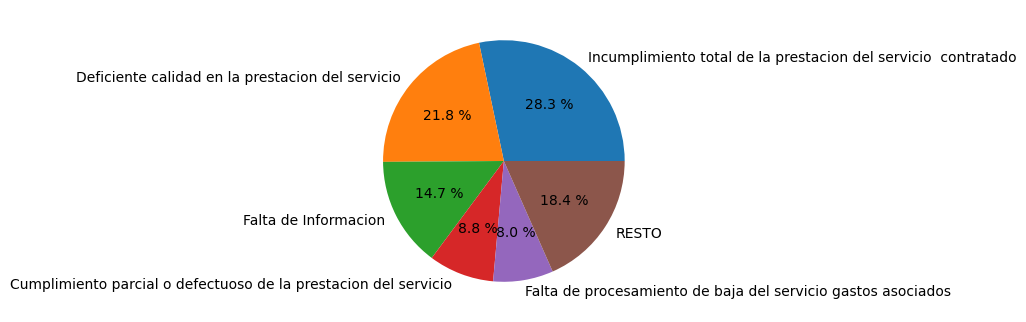

In [89]:
# Creamos una tabla de los motivos del rubro servicios
tabla_motivos = only_service['motivos'].value_counts().reset_index()

# Instanciamos una variable por utilidad
motivos_total = sum(tabla_motivos.motivos)

tabla_motivos['porcentaje'] = round(tabla_motivos['motivos'] / motivos_total*100, 2)

tabla_motivos = tabla_motivos.rename(columns={'index':'motivos','motivos':'cantidad'})


total_motivos_r = tabla_motivos.append(
        {'motivos'   :'TOTAL',
        'cantidad'  :sum(tabla_motivos.cantidad),
        'porcentaje':round( sum(tabla_motivos.porcentaje) )}, 
        ignore_index=True
    )


top5_total_motivos = total_motivos_r.head(5).append(
        {'motivos'   :'RESTO',
        'cantidad'  :sum(tabla_motivos.tail(11).cantidad),
        'porcentaje':round( sum(tabla_motivos.tail(11).porcentaje) )}, 
        ignore_index=True
    )



# Grafico 2: Torta 
fig_serv, ax_serv = plt.subplots(1,1,figsize=(6,4), dpi=100)

ax_serv.pie(top5_total_motivos.cantidad, labels=top5_total_motivos.motivos, autopct='%0.1f %%')
ax_serv.grid('g-.')

#Subtitulo
ax.set_title('5 motivos sobre servicios, y el "resto"', weight=1000, fontsize=12)

# plt.hist(data, bins=50)



total_motivos_r

Los 3 primeros motivos cubren casi el 70% total de las denuncias. Es interesante tambien ver que el 4to motivo que le sigue es un motivo parcial al primero; el sentido es el mismo, pero parcializado, un servicio defectuoso.

A continuacion vamos a analizar cada uno de los motivos mas relevantes:
    1. Incumplimiento total de la prestacion del servicio: con un 28,3% de las denuncias (2.065), se reconoce un incumplimiento de la prestacion de servicio. Este puede ser periodos largos de tiempo sin servicio en donde los damnificados sufren una incapacidad de uso por un servicio pagado.
    2. Deficiencia de calidad: El segundo rubro, con un 21,82% (1.592) los servicios prestados no cumplen las expectativas del damnificado. Esto (por ejemplo), no cumple con los megas de banda ancha acordado, el alcance del modem es acotado, etc.
    3. Falta de informacion: Con un 14,7% de las denuncias, es la informacion relevante que no fue entregada al momento de adquirir el servicio, lo cual termina en la prestación de un servicio incompleto
    4. Cumplimiento parcial o defectuoso: Es el cumplimiento de un servicio parcial (falta parte del producto adquirido como servicio) o defectuoso (similar a deficiencia de calidad)
    5. Falta de procesamiento de baja: Con el 8,04% de denuncias, esta quiza ligado a las practicas abusivas; en ocaciones las empresas de este servicio no procesan la baja del servicioo, y el mismo luego es debitado al proximo mes, generando un circulo vicioso que, en caso de no insistir o reclamar, ocurre lo mismo cada mes. 


Muchos de los rubros mencionados pueden estar estrechamente relacionados, y, quizas puedan encajar de la misma manera en los dos tipos de motivos (por ejemplo *Deficiencia de calidad del servicio*, con *Cumplimiento parcial del servicio*).

Tratandose de un servicio tan necesario como lo son las comunicaciones, aun con la cantidad de denuncias existentes, resulta extraño que no se duplique (o hasta se triplique) las mismas.

Indagaremos sobre las comunas para ver si según el tipo de barrio, existen diferentes denuncias, y que cantidad.

In [90]:
# ---------------- contamos denuncias por comuna y le asignamos un indice ----------------

comuna_count = only_service['comuna'].value_counts()


# 1. Se resetea el index para crear una tabla; 2. se nombran las columnas; 3. Se ordenan comuna segun menor a mayor; 4. Se setea el indice y se borra el indice anterior.

comuna_count = comuna_count.reset_index().set_axis(['comuna','denuncias'],axis=1).sort_values(
    by='comuna').reset_index().drop(columns='index')


comuna_count.sort_values(by='denuncias',ascending=False).reset_index().drop(columns='index')


,comuna,denuncias
0,7,916
1,6,776
2,14,675
3,13,641
4,3,602
5,11,596
6,12,552
7,1,547
8,9,537
9,15,535


Identificamos que la comuna con mayor cantidad de denuncias (comuna 7) duplica nominalmente a la que tiene menos denuncias (comuna 4)

Estos datos de por si no son relevantes si no se lo contrapone con la poblacion de cada comuna.



In [91]:
# ------------Denuncias por communa reales (relacion cantidad de denuncias / cantidad de habitantes ) ------------
# Unificamos en una tabla la poblacion por comuna y sus denuncias en Servicio de comunicacion

denuncia_comuna = population_file.merge(comuna_count, left_on='comuna', right_on='comuna')
denuncia_comuna['%denuncias/comuna'] = round(denuncia_comuna['denuncias']/denuncia_comuna['poblacion'] * 100,2)

#--- Ordenamos la tabla de mayor a menor segun las denuncias Reales por comuna (relacion habitantes sobre denuncias)-----
denuncia_comuna = denuncia_comuna.sort_values(
    by='%denuncias/comuna', ascending=False).reset_index().drop(columns='index')

# Cantidad de personas habitando la Ciudad Autonoma de Buenos Aires
total_poblacion_caba = sum(denuncia_comuna['poblacion'])

denuncia_comuna_sp = denuncia_comuna.drop(columns='poblacion')

denuncia_comuna_sp


,comuna,denuncias,%denuncias/comuna
0,6,776,0.42
1,7,916,0.38
2,2,511,0.34
3,3,602,0.31
4,9,537,0.31
5,11,596,0.31
6,14,675,0.30
7,15,535,0.29
8,13,641,0.27
9,12,552,0.26


Observamos que en terminos reales, la comuna 4 equivale apenas un 2/5 de denuncias en proporciones reales a la comuna 6. 

Es interesante observar como el podio se sique compartiendo entre la comuna 6 y 7, mientras que la comuna paso de estar en el 2do lugar en terminos nominales, a quedar 3ero en terminos reales; lo cual seria el unico cambio realmente significativo.

La comuna 4 permanece con la menor cantidad de denuncias reales.

comuna,7,14,13,6,12,1,2,11,3,9,4,15
motivos,,,,,,,,,,,,
Incumplimiento total de la prestacion del servicio contratado,252,218,196,168,175,168,160,152,149,146,141,140
Deficiente calidad en la prestacion del servicio,173,124,135,190,116,109,109,141,136,118,120,121
Falta de Informacion,106,103,78,97,80,80,47,97,118,137,56,74
Cumplimiento parcial o defectuoso de la prestacion del servicio,121,44,34,122,28,48,37,44,53,19,26,63
Falta de procesamiento de baja del servicio gastos asociados,88,77,47,67,41,27,41,62,45,48,12,32
Falta de entrega o emision del documento de contratacion del servicio,59,34,45,49,36,59,28,27,39,34,28,43
Incumplimiento de Oferta Promociones y/o Bonificaciones.,32,28,40,35,31,29,43,26,25,21,9,25
No reconocimiento de pagos,28,16,14,20,5,9,10,11,15,1,2,10
Precios,18,10,23,9,21,7,6,15,6,3,3,9


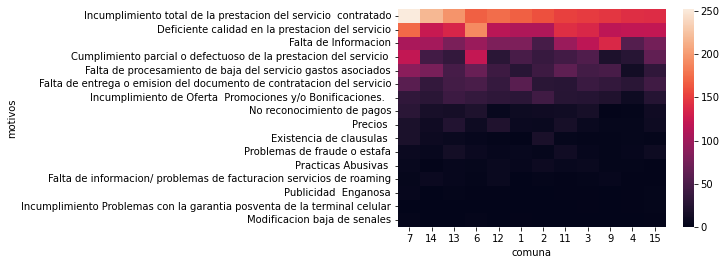

In [92]:
# Cantidad de denuncias por Servicios de comunicacion sobre Comunas (nominales por comuna)

crosstab_comunicaciones = pd.crosstab(index=only_service['motivos'], columns=only_service['comuna'])


rows_index_c = crosstab_comunicaciones.max(axis=1).sort_values(ascending=False).index
col_index_c = crosstab_comunicaciones.max().sort_values(ascending=False).index

order_cross_services = crosstab_comunicaciones.loc[rows_index_c,col_index_c]



sns.heatmap(order_cross_services)
order_cross_services

Podemos ver un degradé en el incumplimiento total de servicios que van desde la izquierda hacia la derecha (pasando por la comuna 7, 14, 13... y asi sucesivamente).
Aunque destaca a los ojos 4 cuadrantes muy particulares:
    *De la comuna 7, *incumplimiento total de la prestacion* y *deficiente calidad*, tambien destaca en menor medida *cumplimiento parcial o defectuoso* aunque no tanto como las otras 2
    *De la comuna 6, *Deficiencia en la calidad* y *cumplimiento parcial o defectuoso* (que dijimos anteriormente que son motivos similares)

Para corroborar nuestro analisis sobre la relevancia de los motivos de la comuna 6 y 7, crearemos una tabla con las denuncias nominales sobre cantidad de habitantes por comuna.


,comuna,poblacion,denuncias,%denuncias/comuna
0,6,184846,776,0.42
1,7,240607,916,0.38
2,2,149720,511,0.34
3,3,192763,602,0.31
4,9,170605,537,0.31
5,11,189986,596,0.31
6,14,226944,675,0.30
7,15,182409,535,0.29
8,13,235967,641,0.27
9,12,213914,552,0.26


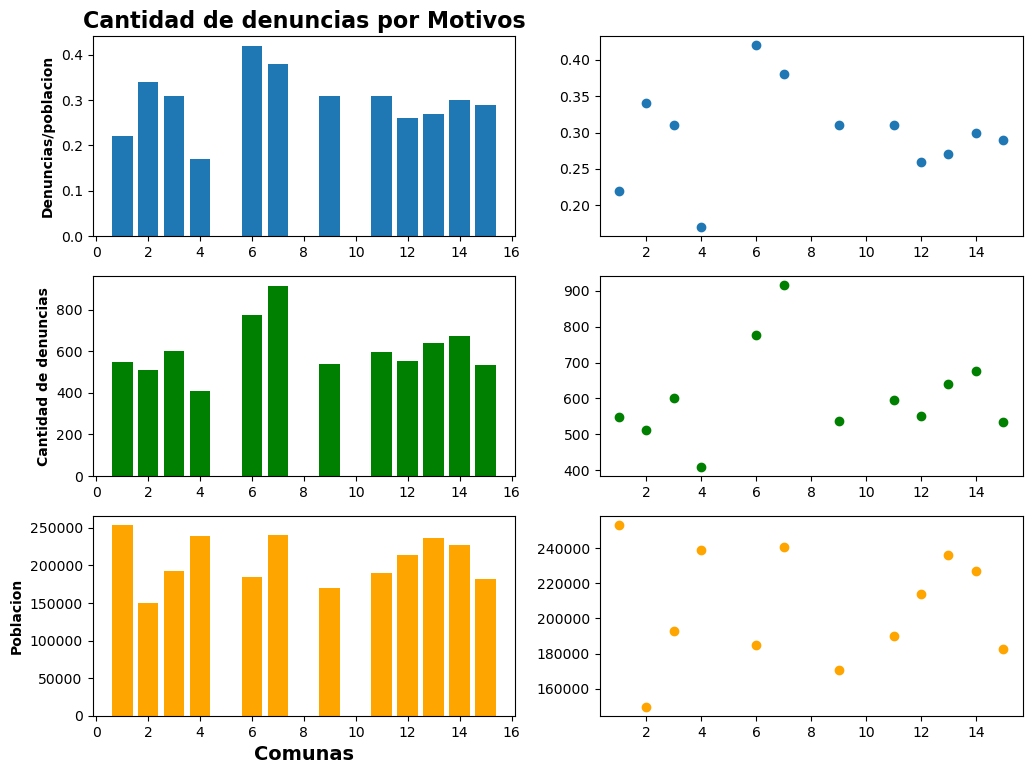

In [93]:


# Hacer un cuadro representativo de porcentaje denuncia, poblacion y denuncias

fig2, axes2 = plt.subplots(3,2, figsize=(12,9), dpi=100)



#genera un trazo accediendo a las graficas a traves del indice de la matriz
axes2[0,0].bar(denuncia_comuna.comuna, denuncia_comuna['%denuncias/comuna'])
axes2[1,0].bar(denuncia_comuna.comuna, denuncia_comuna.denuncias, color='green')
axes2[2,0].bar(denuncia_comuna.comuna, denuncia_comuna.poblacion, color='orange')


# Grafico
axes2[0,1].scatter( denuncia_comuna.comuna, denuncia_comuna['%denuncias/comuna'])
axes2[1,1].scatter( denuncia_comuna.comuna,denuncia_comuna.denuncias, color='green')
axes2[2,1].scatter(denuncia_comuna.comuna, denuncia_comuna.poblacion, color='orange')



#Textos
axes2[2,0].set_xlabel('Comunas', weight=1000, fontsize=14)
axes2[0,0].set_ylabel('Denuncias/poblacion', weight=1000)
axes2[1,0].set_ylabel('Cantidad de denuncias', weight=1000)
axes2[2,0].set_ylabel('Poblacion', weight=1000)

axes2[0,0].set_title('Cantidad de denuncias por Motivos', weight=1000, fontsize=16)




# axes2.plot(motivos_cantidad.index, motivos_cantidad.cantidad,color='gray', marker='.', markerfacecolor='black')

denuncia_comuna




Finalmente descubrimos que la comuna 6 (0,42%) y la comuna 7 (0,38%) tienen la mayor tasa de **denuncias a defensa al consumidor** per capita para el rubro de **Servicio de comunicaciones**.

Estas, ademas, tambien tienen la mayor cantidad de denuncias nominales de entre todas las comunas, estando primero la comuna 7 (916 denuncias), y segundo la comuna 6 (776 denuncias).

En tercer lugar tenemos la comuna 2 con un porcentaje de (0,32%) sobre sus habitantes, con 511 denuncias. Siendo la 2da comuna con menor incidencia en denuncias, quedaria desaprecibido su relevancia en las denuncias en caso de que se analizara nominalmente. 


Los graficos nos sirven para fisualizar los resultados de manera mas sencilla. 
A la izquierda tenemos un grafico de barras, representando la nominalidad de los resultados, y a la derecha grafico de puntos (scatter), esta se adapta a los maximos y minimos, y traza los datos luego, de esta manera podemos comparar de un vistazo mucho mas rapido.
Por ejemplo, vemos que en habitantes, la comuna 1 es la que mas tiene, mientras que la comuna 2 es la menor habitada.

Vemos tambien la comuna 6 y 7, en cantidad de denuncias y denuncias sobre poblacion, son las que mas se distancian de las demás comunas.

## Concluciones finales

Este analisis no es concluyente, aunque puede darnos un panorama general del funcionamiento de los **servicios de comunicaciones** en la Ciudad Autonoma de Buenos Aires.

En el analisis descubrimos que entre el 01-01-2019 hasta el 30-09-2020:
    1. Hubieron 7.297, representando el 22.08% de las denuncias totales, distanciandose con 1.533 (4,64%) con el segundo rubro, y una diferencia de 4.063 denuncias (12,29) con el subsiguiente.
    2. Los motivos de denuncia mas importantes son 2.065 por *incumplimiento de la prestacion de servicio*, 1.592 *deficiente calidad de servicio*, y 1073 por *falta de informacion respectivamente*. Los 3 motivos juntos en el analisis de *servicios de comunicaciones* acumulan un total de 4.730 denuncias. Esto representa mas del 10% de denuncias totales. Los motivos generales de las denuncias son a causa del servicio prestado (o no prestado); muchos de los motivos son similares, y la denominacion de un rubro con X motivo, tambien podria serlo con otro en particular. Por ejemplo, la *deficiencia de calidad* podria renombrarse como *cumplimiento defectuoso*.
    3. Entre los 5 principales motivos (*Incumplimiento total de la prestacion del servicio, Deficiente calidad, Falta de Informacion, Cumplimiento parcial o defectuoso, Falta de procesamiento de baja del servicio*) suman un total de 5.956 denuncias, y un 81,66% de las denuncias de **servicios de comunicaciones**. 
    4. Las comuna 6 (0,42%) y la comuna 7 (0,38%) son las comunas con mayor cantidad de denuncias per capita, y la comuna 7 (916 denuncias) comuna 6 (776 denuncias) tienen la mayor nominalidad de denuncias. La comuna 4 tiene la menor incidencia de denuncias (0,17% con 409 denuncias) seguida por la comuna 1 (0,22% con 547 denuncias), siendo la comuna 1, la comuna con mayor habitantes de toda la Ciudad de Buenos Aires.
    5. Concluimos finalmente que por cantidad de denuncias por comuna, es mas probable que si se vive en algun barrio de la comuna 6 (CABALLITO) o la comuna 7 (FLORES - PARQUE CHACABUCO ), es un **31,5%** mas probable tener ***servicios de comunicaciones* defectosos** (el porcentaje se obtuvo ponderando las comunas 6 y 7 sobre el resto), un 15% mas si estuvieses en la comuna 2, o una probabilidad mayor a 57,5% que si estuvieses en la comuna 4.

Debajo se dejara un recuadro en donde se explicaría cual es la probabilidad de tener algun desperfecto con los servicios de internet, mayor que otras comunas, si vivís en la comuna 6 o 7.
La forma correcta de leer es: 
    Si vivis en la comuna 6 (o 7) hay un...
    *15% mas de probabilidad de tener un desperfecto en internet que si vivieras en la comuna 2.
    *35% mas de probabilidad de tener un desperfecto en internet que si vivieras en la comuna 12.
    *57.5% mas de probabilidad de tener un desperfecto en internet que si vivieras en la comuna 4.
    *30.5% mas de probabilidad de tener un desperfecto, a que si vivieras en otras comunas de la ciudad.

In [94]:
from numpy import mean


ponderacion67 = sum(denuncia_comuna['%denuncias/comuna'].head(2))/2 

probabilidad = denuncia_comuna.drop(columns=['poblacion', 'denuncias'], index=[0,1])
probabilidad['probabilidad'] = (probabilidad['%denuncias/comuna']/ponderacion67 - 1) * -100
probabilidad = probabilidad.drop(columns='%denuncias/comuna').append({
    'comuna':'PONDERADO',
    'probabilidad':mean(probabilidad.probabilidad),
},ignore_index=True)

probabilidad

C:\Users\Romen\AppData\Local\Temp\ipykernel_15004\2451431492.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probabilidad = probabilidad.drop(columns='%denuncias/comuna').append({


,comuna,probabilidad
0,2,15.0
1,3,22.5
2,9,22.5
3,11,22.5
4,14,25.0
5,15,27.5
6,13,32.5
7,12,35.0
8,1,45.0
9,4,57.5


**¿Porqué el analisis no es concluyente?**
    1. En primer lugar, la pagina oficial de la CIUDAD DE BUENOS AIRES no nos provee de los datos de todas las comunas (*comuna 5*: ALMAGRO - BOEDO, *comuna 8*: VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI, *comuna 10*: FLORESTA - MONTE CASTRO - VALEZ SARFIELD - VERSALLES - VILLA LURO - VILLA REAL).
    2. No se tiene en cuenta el nivel de educacion por comuna. Tener conocimientos sobre el canal de defensa al consumidor puede ser una variable que cuanto menos nos genere un desvio a considerar.
    3. El analisis esta dado sobre las denuncias realizadas, entendiendo que las denuncias se realizan como ultima instancia de no poder resolver el problema por otros medios. Los *servicios de comunicaciones* podrian tener un mal funcionamiento aún antes de llegar a realizar una denuncia.
    4. NO CONFUNDIR CON ANALISIS PREDICTIVO. Si algunas de las conclusiones son aplicables para el contexto temporal actual, podría ser una casualidad, ya que el analisis se dio entre el año 2019 y 2020, y no años anteriores ni posteriores; los cuales podrian haber tenido cambios de infraestrucutra relevantes que mejores (o desmejoren) el servicio.


### Agradecimiento

Felicidades por llegar hasta el final. 